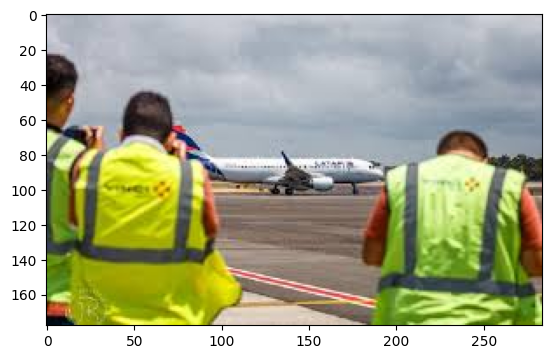

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('aviao.jpg'))

## Monta Base Analítica de Acidentes Aeronáuticos para Estudos

Dados de ocorrências aeronáuticas da aviação civil brasileira.
- https://dados.gov.br/dados/conjuntos-dados/ocorrencias-aeronauticas-da-aviacao-civil-brasileira

Opendata AIG Brazil
A base de dados de ocorrências aeronáuticas contém os dados sobre as aeronaves envolvidas, fatalidades, local, data, horário dos eventos e informações taxonômicas típicas das investigações de acidentes (AIG). São resguardadas a privacidade de pessoas físicas/jurídicas envolvidas conforme previsto pela Lei de Acesso à Informação (Lei n° 12.527, de 18 de novembro de 2011).

Essa base de dados é composta por informações preliminares provenientes do formulário CENIPA-05 (Ficha de Notificação de Ocorrências Aeronáuticas) e consolidada a partir dos relatórios de investigações publicados. Outra forma de visualização desses dados é pelo [__*Painel SIPAER*__](https://painelsipaer.cenipa.fab.mil.br/QvAJAXZfc/opendoc.htm?document=SIGAER%2Fgia%2Fqvw%2Fpainel_sipaer.qvw&host=QVS%40cirros31-37&anonymous=true) disponível na página do CENIPA.

Tabelas (arquivos)
- OCORRÊNCIA.csv - Informações sobre as ocorrências.
- OCORRÊNCIA_TIPO.csv - Informações sobre o tipo de ocorrência.
- AERONAVE.csv - Informações sobre as aeronaves envolvidas nas ocorrências.
- FATOR_CONTRIBUINTE.csv - Informações sobre os fatores contribuinte das ocorrências que tiveram investigações finalizadas.
- RECOMENDAÇÃO.csv - Informações sobre as recomendações de segurança geradas nas ocorrências.

Este projeto visa acessar as bases de dados de acidentes aeronáuticos do cenipa, fazer a limpeza e o tratamento dos dados, selecionar as colunas dos dados relevantes para pesquisa, deixando uma base analítica única para servir de estudo para outros projetos.

## Faz a limpeza dos dados e os devidos tratamentos iniciais, junta os dataframes em um dataset analítico

In [3]:
# importa bibliotecas
import pandas as pd
from pandasql import sqldf
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
# carrega arquivos em dataframes
df_aeronave = pd.read_csv('arquivos/aeronave.csv', sep=';', encoding='latin-1')
df_fator_contribuinte = pd.read_csv('arquivos/fator_contribuinte.csv', sep=';', encoding='latin-1')
df_ocorrencia_tipo = pd.read_csv('arquivos/ocorrencia_tipo.csv', sep=';', encoding='latin-1')
df_ocorrencia = pd.read_csv('arquivos/ocorrencia.csv', sep=';', encoding='latin-1')
df_recomendacao = pd.read_csv('arquivos/recomendacao.csv', sep=';', encoding='latin-1')

In [5]:
# verifica o tamanho dos dataframes
display('df_aeronave', df_aeronave.shape)
display('df_fator_contribuinte', df_fator_contribuinte.shape)
display('df_ocorrencia_tipo', df_ocorrencia_tipo.shape)
display('df_ocorrencia', df_ocorrencia.shape)
display('df_recomendacao', df_recomendacao.shape)

'df_aeronave'

(9926, 23)

'df_fator_contribuinte'

(8065, 5)

'df_ocorrencia_tipo'

(10284, 4)

'df_ocorrencia'

(9821, 22)

'df_recomendacao'

(3481, 9)

In [6]:
# visualiza as colunas dos dataframes, verifica tipo de dados
display('df_aeronave', df_aeronave.info())
display('df_fator_contribuinte', df_fator_contribuinte.info())
display('df_ocorrencia_tipo', df_ocorrencia_tipo.info())
display('df_ocorrencia', df_ocorrencia.info())
display('df_recomendacao', df_recomendacao.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9926 entries, 0 to 9925
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia2           9926 non-null   int64  
 1   aeronave_matricula           9926 non-null   object 
 2   aeronave_operador_categoria  9926 non-null   object 
 3   aeronave_tipo_veiculo        9926 non-null   object 
 4   aeronave_fabricante          9925 non-null   object 
 5   aeronave_modelo              9924 non-null   object 
 6   aeronave_tipo_icao           9925 non-null   object 
 7   aeronave_motor_tipo          9813 non-null   object 
 8   aeronave_motor_quantidade    9926 non-null   object 
 9   aeronave_pmd                 9926 non-null   int64  
 10  aeronave_pmd_categoria       9926 non-null   int64  
 11  aeronave_assentos            9472 non-null   float64
 12  aeronave_ano_fabricacao      9623 non-null   float64
 13  aeronave_pais_fabr

'df_aeronave'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8065 entries, 0 to 8064
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   codigo_ocorrencia3   8065 non-null   int64 
 1   fator_nome           8065 non-null   object
 2   fator_aspecto        8065 non-null   object
 3   fator_condicionante  8065 non-null   object
 4   fator_area           8065 non-null   object
dtypes: int64(1), object(4)
memory usage: 315.2+ KB


'df_fator_contribuinte'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10284 entries, 0 to 10283
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo_ocorrencia1         10284 non-null  int64 
 1   ocorrencia_tipo            10284 non-null  object
 2   ocorrencia_tipo_categoria  10284 non-null  object
 3   taxonomia_tipo_icao        10284 non-null  object
dtypes: int64(1), object(3)
memory usage: 321.5+ KB


'df_ocorrencia_tipo'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9821 entries, 0 to 9820
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               9821 non-null   int64 
 1   codigo_ocorrencia1              9821 non-null   int64 
 2   codigo_ocorrencia2              9821 non-null   int64 
 3   codigo_ocorrencia3              9821 non-null   int64 
 4   codigo_ocorrencia4              9821 non-null   int64 
 5   ocorrencia_classificacao        9821 non-null   object
 6   ocorrencia_latitude             7240 non-null   object
 7   ocorrencia_longitude            7240 non-null   object
 8   ocorrencia_cidade               9821 non-null   object
 9   ocorrencia_uf                   9821 non-null   object
 10  ocorrencia_pais                 9821 non-null   object
 11  ocorrencia_aerodromo            9821 non-null   object
 12  ocorrencia_dia                  9821 non-null   

'df_ocorrencia'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   codigo_ocorrencia4               3481 non-null   int64 
 1   recomendacao_numero              3481 non-null   object
 2   recomendacao_dia_assinatura      3481 non-null   object
 3   recomendacao_dia_encaminhamento  3481 non-null   object
 4   recomendacao_dia_feedback        2720 non-null   object
 5   recomendacao_conteudo            3481 non-null   object
 6   recomendacao_status              3481 non-null   object
 7   recomendacao_destinatario_sigla  3481 non-null   object
 8   recomendacao_destinatario        3481 non-null   object
dtypes: int64(1), object(8)
memory usage: 244.9+ KB


'df_recomendacao'

None

In [7]:
# visualiza primeiras linhas dos dataframes
df_aeronave.head(1)

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,83097,PRHDB,***,HELICÓPTERO,ROBINSON HELICOPTER,R44,R44,PISTÃO,MONOMOTOR,1088,1088,4.0,2001.0,BRASIL,BRASIL,HELICÓPTERO,PARTICULAR,CAMPO DE MARTE - SP,MAROUM,CRUZEIRO,***,SUBSTANCIAL,4


In [8]:
# visualiza primeiras linhas dos dataframes
df_ocorrencia_tipo.head(1)

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,83097,INDETERMINADO,INDETERMINADO,UNK


In [9]:
# visualiza primeiras linhas dos dataframes
df_fator_contribuinte.head(1)

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,81624,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL


In [10]:
# visualiza primeiras linhas dos dataframes
df_recomendacao.head(1)

,codigo_ocorrencia4,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
0,81172,IG-143/CENIPA/2022 - 01,2023-11-22,2023-11-27,NaN,Avaliar a pertinência de revisar a ICA 100-37 ...,AGUARDANDO RESPOSTA,DECEA,DEPARTAMENTO DE CONTROLE DE ESPAÇO AÉREO


In [11]:
# visualiza primeiras linhas dos dataframes
df_ocorrencia.head(1)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,83097,83097,83097,83097,83097,ACIDENTE,-2.352.777.777.777,-4.563.944.444.444,PARAIBUNA,SP,BRASIL,***,31/12/2023,18:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


In [12]:
# junta os dados selecionados na base de acidentes analítica
df_acidentes = sqldf('select oc.ocorrencia_classificacao, oc.ocorrencia_cidade, oc.ocorrencia_uf, oc.ocorrencia_pais, oc.ocorrencia_aerodromo, ' \
                     '       oc.ocorrencia_dia, oc.ocorrencia_hora, oc.investigacao_status, oc.total_aeronaves_envolvidas, oc.ocorrencia_saida_pista, ' \
                     
                     '       ae.aeronave_matricula, ae.aeronave_tipo_veiculo, ae.aeronave_fabricante, ae.aeronave_modelo, ' \
                     '       ae.aeronave_tipo_icao, ae.aeronave_motor_tipo, ae.aeronave_motor_quantidade, ae.aeronave_pmd, ae.aeronave_pmd_categoria, ' \
                     '       ae.aeronave_assentos, ae.aeronave_ano_fabricacao, ae.aeronave_pais_fabricante, ae.aeronave_pais_registro, ae.aeronave_registro_categoria, ' \
                     '       ae.aeronave_registro_segmento, ae.aeronave_voo_origem, ae.aeronave_voo_destino, ae.aeronave_fase_operacao, ae.aeronave_tipo_operacao, ' \
                     '       ae.aeronave_nivel_dano, ae.aeronave_fatalidades_total, ' \
                     
                     '       ot.ocorrencia_tipo, ot.ocorrencia_tipo_categoria, ot.taxonomia_tipo_icao, ' \
                     
                     '       fc.fator_nome, fc.fator_aspecto, fc.fator_condicionante, fc.fator_area, ' \
                     
                     '       re.recomendacao_conteudo, re.recomendacao_status, re.recomendacao_destinatario_sigla, ' \
                     '       re.recomendacao_destinatario ' \
                     
                     'from df_ocorrencia oc ' \
                     'inner join df_aeronave ae on (ae.codigo_ocorrencia2 = oc.codigo_ocorrencia2) ' \
                     'inner join df_ocorrencia_tipo ot on (ot.codigo_ocorrencia1 = oc.codigo_ocorrencia1) ' \
                     'inner join df_fator_contribuinte fc on (fc.codigo_ocorrencia3 = oc.codigo_ocorrencia3) ' \
                     'inner join df_recomendacao re on (re.codigo_ocorrencia4 = oc.codigo_ocorrencia4) ' \
                     
                     'order by oc.ocorrencia_dia, oc.ocorrencia_hora'
                     
                     )

In [13]:
# verifica as primeiras linhas do novo dataframe
df_acidentes.head(3)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
0,ACIDENTE,MOGI DAS CRUZES,SP,BRASIL,***,01/01/2009,15:35:00,FINALIZADA,1,NÃO,PTLDO,AVIÃO,NORTH AMERICAN,AT-6D,T6,PISTÃO,MONOMOTOR,2404,2404,2.0,1942.0,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,CAMPO DE MARTE - SP,SANTOS DUMONT,ESPECIALIZADA,ESPECIALIZADA,SUBSTANCIAL,0,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,Aplicar processos que melhorem a qualidade da ...,***,AEROCAMP,AEROCAMP COMÉRCIO E SERVIÇOS AERONÁUTICOS
1,ACIDENTE,MOGI DAS CRUZES,SP,BRASIL,***,01/01/2009,15:35:00,FINALIZADA,1,NÃO,PTLDO,AVIÃO,NORTH AMERICAN,AT-6D,T6,PISTÃO,MONOMOTOR,2404,2404,2.0,1942.0,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,CAMPO DE MARTE - SP,SANTOS DUMONT,ESPECIALIZADA,ESPECIALIZADA,SUBSTANCIAL,0,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,Dar ampla divulgação aos operadores de aeronav...,***,ABAAC,ASSOCIAÇÃO BRASILEIRA DE AERONAVES ANTIGAS E C...
2,ACIDENTE,MOGI DAS CRUZES,SP,BRASIL,***,01/01/2009,15:35:00,FINALIZADA,1,NÃO,PTLDO,AVIÃO,NORTH AMERICAN,AT-6D,T6,PISTÃO,MONOMOTOR,2404,2404,2.0,1942.0,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,CAMPO DE MARTE - SP,SANTOS DUMONT,ESPECIALIZADA,ESPECIALIZADA,SUBSTANCIAL,0,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,Enfatizar o estrito cumprimento dos procedimen...,***,EXTREME,EXTREME DEMONSTRAÇÕES AÉREAS


In [14]:
# verifica o tipo de variáveis
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         22234 non-null  object 
 1   ocorrencia_cidade                22234 non-null  object 
 2   ocorrencia_uf                    22234 non-null  object 
 3   ocorrencia_pais                  22234 non-null  object 
 4   ocorrencia_aerodromo             22234 non-null  object 
 5   ocorrencia_dia                   22234 non-null  object 
 6   ocorrencia_hora                  22234 non-null  object 
 7   investigacao_status              22230 non-null  object 
 8   total_aeronaves_envolvidas       22234 non-null  int64  
 9   ocorrencia_saida_pista           22234 non-null  object 
 10  aeronave_matricula               22234 non-null  object 
 11  aeronave_tipo_veiculo            22234 non-null  object 
 12  aeronave_fabricant

In [15]:
# verifica os registros duplicados
df_acidentes.duplicated().sum()

74

In [16]:
# elimina os registros duplicados
df_acidentes = df_acidentes.drop_duplicates(keep='last')

In [17]:
# verifica o tamanho do dataframe
df_acidentes.shape

(22160, 42)

In [18]:
# salva os dados juntados em arquivo csv
df_acidentes.sort_values(by=["ocorrencia_dia"]).to_csv('arquivos_tratados/df_acidentes.csv', index=False)